In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

```
conda activate TVB #여기에 저장됨
```

In [2]:
import bct
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import pingouin
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

# importing and making packages관련 :
https://stackoverflow.com/a/9049246/9042297  : 왜 (처음에) import utils 한 후에 utils.load_data하면 바로 안되는지(no package found라고 뜸)
* solutions : 
    1. `__init__.py`안에다가, `from .import load_data`라고 해야한다 $\rightarrow{}$ 나는 이걸 썼다
    2. 또는, `import utils.load__data`라고, 직접 importing할때 reference 해도 된다(단 이러면 여러개 import해야할때 귀찮아짐)



# 0. Importing Module/Data

In [3]:
#####IMPORTING utils module#####
## so that we can import from one directory above's utils
#https://blog.finxter.com/python-how-to-import-modules-from-another-folder/
sys.path.append("/scratch/connectome/TVB/TVB_RESEARCH")
sys.path

['/scratch/connectome/TVB/TVB_RESEARCH/Brain_Connectivity',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/connectome/dyhan316/.local/lib/python3.8/site-packages',
 '/scratch/connectome/dyhan316/TVB/TVB_showcase/virtual_aging_showcase_copy/virtual_ageing',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/scratch/connectome/TVB/TVB_RESEARCH']

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
#####IMPORTING dataset/metadata and so on#####
data_dir = '/storage/bigdata/ABCD/TVB/data'
import utils #now imports becasue it looks at the last added sys path

dataset = utils.load_data_ABCD.ABCDDataset(data_dir)  #이제 된다
subjects = dataset.list_subjects()
meta_data = utils.load_data_ABCD.metadata()
meta_data.total_data

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fddc4388ca0>


,subjectkey,eventname,nihtbx_picvocab_uncorrected,nihtbx_flanker_uncorrected,nihtbx_list_uncorrected,nihtbx_cardsort_uncorrected,nihtbx_pattern_uncorrected,nihtbx_picture_uncorrected,nihtbx_reading_uncorrected,nihtbx_fluidcomp_uncorrected,...,scz_easauto,scz_metaauto,smokerauto,worryauto,anxietyauto,ptsdeur4,ptsdmeta6,adhdeur6,euro,race_g
0,NDARMC003PZF,6_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDARMC003PZF,18_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDARMC003PZF,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDARMC003PZF,baseline_year_1_arm_1,87.0,89.0,90.0,82.0,80.0,117.0,83.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDARMC003PZF,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74165,NDARINVZZZP87KR,2_year_follow_up_y_arm_1,86.0,90.0,NaN,NaN,111.0,113.0,98.0,NaN,...,1.611661,0.852721,-2.022264,-0.410203,0.935885,1.204604,-0.448269,-0.428845,0.0,1.0
74166,NDARINVZZZP87KR,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.611661,0.852721,-2.022264,-0.410203,0.935885,1.204604,-0.448269,-0.428845,0.0,1.0
74167,NDARINVZZZP87KR,18_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.611661,0.852721,-2.022264,-0.410203,0.935885,1.204604,-0.448269,-0.428845,0.0,1.0
74168,NDARINVZZZP87KR,baseline_year_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.611661,0.852721,-2.022264,-0.410203,0.935885,1.204604,-0.448269,-0.428845,0.0,1.0


In [5]:
#demo data
meta_data.load_demo()

/scratch/connectome/TVB/TVB_RESEARCH/utils/load_data_ABCD.py:97: UserWarning: We will use the baseline year's demo data, as it has the most... 
  warnings.warn("We will use the baseline year's demo data, as it has the most... ")


,subjectkey,sex,race_g,married,high_educ,high_educ2,income,foreign_born,religion_prefer,gay_parent,...,vol,bmi,total_ratio,history_ratio,parent_identity,demo_brthdat_v2,demo_sex_v2,gender_identity,parent_age,foreign_born_family
3,NDARMC003PZF,F,NaN,5.0,15.0,NaN,2.0,0.0,0.0,3.0,...,NaN,15.741082,0.260870,0.260870,1.0,10.0,2.0,2.0,31.0,1.0
10,NDARINV003RTV85,F,4.0,1.0,13.0,13.0,8.0,0.0,0.0,3.0,...,-1.050932,20.480539,0.195652,0.195652,1.0,10.0,2.0,2.0,43.0,0.0
15,NDARINV005V6D2C,F,0.0,1.0,6.0,NaN,NaN,0.0,NaN,3.0,...,NaN,22.022085,0.000000,0.000000,1.0,10.0,2.0,2.0,39.0,1.0
20,NDARINV007W6H7B,M,4.0,1.0,19.0,18.0,10.0,0.0,1.0,3.0,...,NaN,18.234287,0.173913,0.173913,2.0,10.0,1.0,1.0,41.0,0.0
25,NDARINV00BD7VDC,M,4.0,1.0,20.0,20.0,10.0,0.0,2.0,3.0,...,1.129021,16.329800,0.217391,0.217391,1.0,9.0,1.0,1.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74138,NDARINVZZNX6W2P,M,NaN,1.0,18.0,18.0,9.0,0.0,1.0,3.0,...,-0.208130,16.364477,0.000000,0.000000,1.0,10.0,1.0,1.0,40.0,0.0
74149,NDARINVZZPKBDAC,F,4.0,1.0,19.0,18.0,10.0,0.0,0.0,3.0,...,-0.274180,18.253073,0.000000,0.000000,2.0,9.0,2.0,2.0,49.0,1.0
74154,NDARINVZZZ2ALR6,F,4.0,1.0,21.0,21.0,10.0,0.0,2.0,3.0,...,-0.373333,13.979693,0.043478,0.043478,2.0,10.0,2.0,2.0,45.0,1.0
74162,NDARINVZZZNB0XC,F,4.0,1.0,19.0,13.0,3.0,0.0,0.0,3.0,...,-0.208464,18.446064,0.130435,0.130435,1.0,9.0,2.0,2.0,31.0,1.0


In [6]:
##looking at some examples
sample_sub = subjects[0]
print(subjects[:10])
print(dataset.load_sc(sample_sub).shape)   # load SC
print(dataset.load_bold(sample_sub).shape) # load BOLD
print(dataset.parcellation_100()) #the node names
meta_data.total_data.head()

['NDARINV0X4A2LKW', 'NDARINVRERRA7FD', 'NDARINV43M1L7PL', 'NDARINV6WH2N8P4', 'NDARINVFKFN7X0T', 'NDARINVYJETWGU1', 'NDARINVNUNMDE7M', 'NDARINVPUEXNZJU', 'NDARINVCYA7HWRK', 'NDARINVPXYXMXTH']
(84, 84)
(370, 84)
['L-AC', 'L-AM', 'L-BSTS', 'L-CA', 'L-CACG', 'L-CER', 'L-CMFG', 'L-CU', 'L-EC', 'L-FG', 'L-FP', 'L-HI', 'L-ICG', 'L-IN', 'L-IPG', 'L-ITG', 'L-LG', 'L-LOFG', 'L-LOG', 'L-MOFG', 'L-MTG', 'L-PA', 'L-PCAL', 'L-PCG', 'L-PCU', 'L-PHIG', 'L-POP', 'L-POR', 'L-PTR', 'L-PU', 'L-PaCG', 'L-PoCG', 'L-PrCG', 'L-RACG', 'L-RMFG', 'L-SFG', 'L-SMG', 'L-SPG', 'L-STG', 'L-TH', 'L-TP', 'L-TTG', 'R-AC', 'R-AM', 'R-BSTS', 'R-CA', 'R-CACG', 'R-CER', 'R-CMFG', 'R-CU', 'R-EC', 'R-FG', 'R-FP', 'R-HI', 'R-ICG', 'R-IN', 'R-IPG', 'R-ITG', 'R-LG', 'R-LOFG', 'R-LOG', 'R-MOFG', 'R-MTG', 'R-PA', 'R-PCAL', 'R-PCG', 'R-PCU', 'R-PHIG', 'R-POP', 'R-POR', 'R-PTR', 'R-PU', 'R-PaCG', 'R-PoCG', 'R-PrCG', 'R-RACG', 'R-RMFG', 'R-SFG', 'R-SMG', 'R-SPG', 'R-STG', 'R-TH', 'R-TP', 'R-TTG']


,subjectkey,eventname,nihtbx_picvocab_uncorrected,nihtbx_flanker_uncorrected,nihtbx_list_uncorrected,nihtbx_cardsort_uncorrected,nihtbx_pattern_uncorrected,nihtbx_picture_uncorrected,nihtbx_reading_uncorrected,nihtbx_fluidcomp_uncorrected,...,scz_easauto,scz_metaauto,smokerauto,worryauto,anxietyauto,ptsdeur4,ptsdmeta6,adhdeur6,euro,race_g
0,NDARMC003PZF,6_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDARMC003PZF,18_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDARMC003PZF,3_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDARMC003PZF,baseline_year_1_arm_1,87.0,89.0,90.0,82.0,80.0,117.0,83.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDARMC003PZF,30_month_follow_up_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**soft warning**
1. BOLD data is not well registered (desikan killiany atlas이면) => new ROI extraction needed
    * 상윤쌤 said some nii didn't work => 어떻게 할지 모르겠다.. (talk later?)
2. ID_HBP, but not HBP (ABCD) (some naming missing, but didn't care ot change)

In [7]:
meta_data.load_demo()

/scratch/connectome/TVB/TVB_RESEARCH/utils/load_data_ABCD.py:97: UserWarning: We will use the baseline year's demo data, as it has the most... 
  warnings.warn("We will use the baseline year's demo data, as it has the most... ")


,subjectkey,sex,race_g,married,high_educ,high_educ2,income,foreign_born,religion_prefer,gay_parent,...,vol,bmi,total_ratio,history_ratio,parent_identity,demo_brthdat_v2,demo_sex_v2,gender_identity,parent_age,foreign_born_family
3,NDARMC003PZF,F,NaN,5.0,15.0,NaN,2.0,0.0,0.0,3.0,...,NaN,15.741082,0.260870,0.260870,1.0,10.0,2.0,2.0,31.0,1.0
10,NDARINV003RTV85,F,4.0,1.0,13.0,13.0,8.0,0.0,0.0,3.0,...,-1.050932,20.480539,0.195652,0.195652,1.0,10.0,2.0,2.0,43.0,0.0
15,NDARINV005V6D2C,F,0.0,1.0,6.0,NaN,NaN,0.0,NaN,3.0,...,NaN,22.022085,0.000000,0.000000,1.0,10.0,2.0,2.0,39.0,1.0
20,NDARINV007W6H7B,M,4.0,1.0,19.0,18.0,10.0,0.0,1.0,3.0,...,NaN,18.234287,0.173913,0.173913,2.0,10.0,1.0,1.0,41.0,0.0
25,NDARINV00BD7VDC,M,4.0,1.0,20.0,20.0,10.0,0.0,2.0,3.0,...,1.129021,16.329800,0.217391,0.217391,1.0,9.0,1.0,1.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74138,NDARINVZZNX6W2P,M,NaN,1.0,18.0,18.0,9.0,0.0,1.0,3.0,...,-0.208130,16.364477,0.000000,0.000000,1.0,10.0,1.0,1.0,40.0,0.0
74149,NDARINVZZPKBDAC,F,4.0,1.0,19.0,18.0,10.0,0.0,0.0,3.0,...,-0.274180,18.253073,0.000000,0.000000,2.0,9.0,2.0,2.0,49.0,1.0
74154,NDARINVZZZ2ALR6,F,4.0,1.0,21.0,21.0,10.0,0.0,2.0,3.0,...,-0.373333,13.979693,0.043478,0.043478,2.0,10.0,2.0,2.0,45.0,1.0
74162,NDARINVZZZNB0XC,F,4.0,1.0,19.0,13.0,3.0,0.0,0.0,3.0,...,-0.208464,18.446064,0.130435,0.130435,1.0,9.0,2.0,2.0,31.0,1.0


# 1. Brain Connectivity Measures (BCT) 써서 하기

참고 : 상윤쌤의 코드 보면 도움됨

# X.X (numbering 나중에 고려하기)어떤 module들이 있고, 어느 것들을 implement해서 볼까?

implement할떄, 
> https://sites.google.com/site/bctnet/list-of-measures
여기에 있는 것들 쓰면 됨!!!


(function 이름이 bctpy랑 똑같다 (뒤에 .m extensino만 없에면)

(실제로 module내에서 뭐가 되어있는지 보고 싶으면 밑의 것들을 하면 된다)
```
help(bct) #help on the module itself
dir(bct) # lists all possible functions
help(bct.degrees_und) #실제 있는 하나의 functino중 하나봄
```

```
help(bct.modularity) #이거보면 사실 modularity종류가 엄청 많은 듯...?
#이거 이해하려면 => modularity 이론 공부를 더 해야함
```


## 주의하기!! : bold의 경우, bold 가 아닌 FC를 만들어서 거기서 bct의 함수들을 써야한다! (다른 matrix도 넣어보기?) (or FCD?)
* 이것을 FC folder을 따로 만들어서 거기서 뽑아서 쓸지, 아니면 돌릴떄마다 FC를 구하게 할지 두가지중 하나로 선택해야 할듯
    * 아마도 첫번째를 해야할듯 (기존의 storage folder에 있던 그 data folder에 subject 별로 새로운 FC_REAL folder 을 추가한 후, `load_data.py`의 method 중 하나로 넣어야 할듯(?))
    * 첫번째 해야하는 이유는, FC 계산할때마다 시간 거림


근데 생각해보니, FCD는 `load_data.py`처럼, 따로 `analysis.py`라든지 같은 sepearte module화 해야할듯 (bct에서 구현 안된거를 jupyter 에다가 구현하는 것은 일을 두번 하는 것이니)(아니면 `FCD.py`만들어서 거기다가 FCD 종류들 다 때려넣기?? ㅋㅋ)


## BCT 결과 어떻게 저장(정리?)
* 일단 `compute_bct_measures`라는 class로 만들어서 했다
BCT output이 크게 scalar, vector, matrix가 나올텐데, 이들을 
* scalar 끼리 묵기, => matrix (one row of scalar properties per person) => or 사람별로 file저장?
* vector끼리 묵기 (즉, degree 같은 1D들은 그들끼리 묶기) => rank4 tensor (or 사람별로 folder저장?)
* matrix끼리 묶기
이렇게 세개로 각각 묶어서 따로 저장하기!
   

## 1.1. 일단 `conn_measures.py`라는 모듈에 넣은 `compute_bct_measures`를 (sample)로 가져오자

(0~1로 min/maxing을 한 후에 했다! (__init__내에서 min/maxing을 함))


밑에서 보듯이, 만약 돌릴꺼라면, sample usability check을 꼭 해주기!!

* scalar : all single number dict
* vector : all vectors, except `s_core_size`, which is size 100 not 84, and `rich_club_coef`, which is random size length
* matrix : all (84,84)

In [8]:
#####testing stuff out####

#checking shape
sample_sc = dataset.load_sc(sample_sub)
threshold = 0.3

#data, names = utils.conn_measures.compute_bct_UW(sample_sc).scalar_properties()
#data, names = utils.conn_measures.compute_bct_UW(sample_sc, threshold= threshold).vector_properties()
data, names = utils.conn_measures.compute_bct_UW(sample_sc, threshold = threshold).matrix_properties()
print("put in checking thing (outlier check)")
print([data[i].shape for i in names])
print(names)


#samples (이것을 for loop돌리던지 하기)
sample_i = utils.conn_measures.compute_bct_UW(sample_sc, threshold = threshold)

if sample_i.usability_check_density_based() == None: #if outlier, None 을 return하도록 했었다.
    raise Exception("outlier detected, terminating")

#example로 scalar_properties 구해보자
#sample_i.scalar_properties()
print("rich club이 NAN으로 나오는 것들이 몇개 있다... 왜이런지 모르겠다ㅠㅠ 일단은 그냥 하자 ")
sample_i.vector_properties() #checking if score is well implemented

#print([type(sample_i.vector_properties()[0][i]) for i in sample_i.vector_properties()[0] ])

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/utils/miscellaneous_utilities.py:72: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  r = np.sum((np.max(len(np.unique(cis[:, i])))) for i in range(m))


put in checking thing (outlier check)
[(84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84)]
dict_keys(['matrix_itself_norm_thresh', 'agreement', 'mean_first_passage_time', 'dist_mat', 'num_edge_shortest_path', 'shortest_path_len', 'num_edges_shortest_path', 'Pmat', 'edge_btw_mat'])
rich club이 NAN으로 나오는 것들이 몇개 있다... 왜이런지 모르겠다ㅠㅠ 일단은 그냥 하자 


/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/core.py:136: RuntimeWarning: invalid value encountered in double_scalars
  term1 = np.sum(stri * strj) / K
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/core.py:137: RuntimeWarning: invalid value encountered in double_scalars
  term2 = np.square(np.sum(.5 * (stri + strj)) / K)
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/core.py:138: RuntimeWarning: invalid value encountered in double_scalars
  term3 = np.sum(.5 * (stri * stri + strj * strj)) / K
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/core.py:411: RuntimeWarning: invalid value encountered in double_scalars
  loc_assort_neg[curr_node] = np.sum(np.abs(str_neg[jn] -
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/core.py:411: RuntimeWarning: invalid value encountered in double_scalars
  loc_assort_neg[curr_node] = np.sum(np.abs(str_neg[jn] 

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/centrality.py:661: RuntimeWarning: invalid value encountered in true_divide
  Z[np.where(ci == i)] = (Koi - np.mean(Koi)) / np.std(Koi)
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, cop

({'degrees': array([10., 14., 20., 27., 21., 13., 28., 17., 14., 22., 14., 25., 29.,
         40., 31., 29., 20., 22., 34., 21., 25., 25., 14., 23., 35., 11.,
         26., 15., 16., 43., 23., 29., 34., 24., 40., 46., 33., 39., 25.,
         48.,  5., 12., 10., 16., 13., 36., 23., 15., 22., 11., 15., 18.,
         16., 27., 28., 38., 36., 27., 20., 23., 35., 18., 26., 26., 13.,
         22., 32., 15., 20., 15., 19., 42., 24., 30., 35., 23., 41., 48.,
         32., 45., 26., 45., 12., 12.]),
  'clustering_coef': array([0.01842734, 0.01319654, 0.02156329, 0.01734635, 0.01651169,
         0.00941016, 0.0193721 , 0.02165484, 0.00885172, 0.02058926,
         0.01542063, 0.01323346, 0.01048571, 0.01512223, 0.02219757,
         0.01975666, 0.01527971, 0.02795938, 0.01717516, 0.01893737,
         0.01964362, 0.01184897, 0.02861012, 0.01268616, 0.01338176,
         0.0160159 , 0.01705596, 0.0279279 , 0.02835619, 0.01487361,
         0.0166984 , 0.0186066 , 0.02494831, 0.01453238, 0.02141112,
  

## rich club이 NAN으로 나오는 것들이 몇개 있다... 왜이런지 모르겠다ㅠㅠ 일단은 그냥 하자 => 왜 이런지 찾아보기!

90.85421470663591
4964
7056
[3 2 2 3 3 1 3 2 2 2 3 2 2 3 2 2 2 3 2 3 2 3 2 3 2 2 3 3 3 3 3 2 3 3 3 3 2
 2 2 3 3 2 5 4 4 5 5 1 5 4 4 4 5 4 4 5 4 4 4 5 4 5 4 5 4 5 4 4 5 5 5 5 5 5
 5 5 5 5 5 4 4 5 4 4]
Help on function score_wu in module bct.algorithms.core:

score_wu(CIJ, s)
    The s-core is the largest subnetwork comprising nodes of strength at
    least s. This function computes the s-core for a given weighted
    undirected connection matrix. Computation is analogous to the more
    widely used k-core, but is based on node strengths instead of node
    degrees.
    
    Parameters
    ----------
    CIJ : NxN np.ndarray
        weighted undirected connection matrix
    s : float
        level of s-core. Note that can take on any fractional value.
    
    Returns
    -------
    CIJscore : NxN np.ndarray
        connection matrix of the s-core. This matrix contains only nodes with
        a strength of at least s.
    sn : int
        size of s-core

(84, 84) 63
79.36834913314544
[0

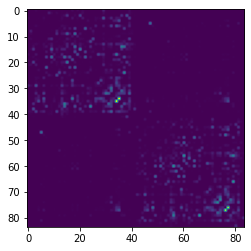

In [9]:
print(np.sum(sample_i.mat))
plt.imshow(sample_i.mat)
print(np.sum(sample_i.mat == 0))
print(84*84)
print(sample_i.modular_structures)
help(bct.score_wu)
print("======== ")


##score 은 두번째만 가져가도 될듯 => 따라서, scalar에만 해도 될듯.. 아니다! output으로 둘 것이기에 vector로 하는 것이 좋다
#score 은 output형태가 vector로 구분하는게 맞을 듯(여러번 다양한 s 값에 대해서 돌려서 나온 결과를 할 것이니)
a,b = bct.score_wu(sample_i.mat, 0.5)
print(a.shape, b)
print(np.sum(a))

##implementing (나중에 하기 위해서)
#print(np.linspace(0,1,100))

print("===========================================")

s_core_index_list = np.zeros(sample_i.n_node)
s_core_size = np.zeros(100)
for i,s_core in enumerate(np.linspace(0,1,100)):
    ss, s_core_size[i] = bct.score_wu(sample_i.mat, s_core)
    cond = ss.sum(axis=1) != 0 #i.e. True if not zero (meaningful), (i.e. the thing is not zero things)
    s_core_index_list[cond] = s_core #어떤 score이었을때 되었는지를 keep track
print(s_core_index_list)#.shape)
print(s_core_size)#.shape)
print(s_core_index_list.shape)
print(s_core_size.shape)
print(ss.sum(axis=1).shape)
print(ss.sum(axis=1)!=0) #is a MATRIX1 => 이것을 넣는다
print("===========================================")


##kcoreness는 모르겠다 
print("=========")
np.sign(sample_i.mat) #binarize the thing
c, d = bct.kcoreness_centrality_bu(np.sign(sample_i.mat))
print(c.shape, d.shape)
print(c)
print(d)
#print(bct.kcoreness_centrality_bu(np.sign(sample_i.mat))[0].shape)

In [10]:
print(len(set(bct.get_components(sample_i.mat)[0])))
print(bct.get_components(sample_i.mat)[0])
modular_structures, modularities = bct.community_louvain(sample_i.mat)

print(modular_structures.shape)
print(modularities)
#sample_i.mat.shape #84*84
help(bct.get_components)

1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
(84,)
0.552654972744342
Help on function get_components in module bct.algorithms.clustering:

get_components(A, no_depend=False)
    Returns the components of an undirected graph specified by the binary and
    undirected adjacency matrix adj. Components and their constitutent nodes
    are assigned the same index and stored in the vector, comps. The vector,
    comp_sizes, contains the number of nodes beloning to each component.
    
    Parameters
    ----------
    A : NxN np.ndarray
        binary undirected adjacency matrix
    no_depend : Any
        Does nothing, included for backwards compatibility
    
    Returns
    -------
    comps : Nx1 np.ndarray
        vector of component assignments for each node
    comp_sizes : Mx1 np.ndarray
        vector of component sizes
    
    Notes
    -----
    Note: d

In [11]:
#testing with artificial stuff 
warnings.filterwarnings('always')
a = np.array(np.random.rand(20,20)<0.9, dtype = int)
b = np.array((a+a.T/2 >0), dtype = int)


#finding out what get_components does
print(b)
print(bct.get_components(b))
print(len(bct.get_components(b)[1])) #이것을 쓰자

c = a+a.T
sam_c = utils.conn_measures.compute_bct_UW(c, threshold= 0.6)#threshold = threshold)
print("======")
print(c)
print(bct.get_components(c))
print(bct.get_components(sam_c.mat))
print("======")



result = sam_c.usability_check_density_based()
print(result)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([20]))
1
[[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 1 2

In [12]:
for i in range(10):
    if bool(i==0 or i == 3) != True:
        continue
    print(i)
    

0
3


In [13]:
keys = ['char_path_len', 'global_efficiency', 'graph_radius', 'graph_diameter']
data_dict = dict(zip(keys, bct.charpath(data["matrix_itself_norm_thresh"])))

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/distance.py:157: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = np.mean(1 / Dv)


In [14]:
for i in zip(keys, bct.charpath(data["matrix_itself_norm_thresh"])):
    print(i)
print(dict(zip(keys, bct.charpath(data["matrix_itself_norm_thresh"]))))

('char_path_len', 0.013031298724417087)
('global_efficiency', inf)
('graph_radius', array([0.08497737, 0.0797677 , 0.24844137, 0.26834059, 0.23221454,
       0.37125288, 0.25962934, 0.3094201 , 0.0797677 , 0.38201384,
       0.06140576, 0.22478435, 0.2101802 , 0.16414724, 0.416261  ,
       0.43522077, 0.22444274, 0.40729353, 0.38201384, 0.23247075,
       0.43522077, 0.10923221, 0.31454437, 0.08702707, 0.47928944,
       0.22478435, 0.1595354 , 0.21897686, 0.21436502, 0.26834059,
       0.36706807, 0.31650867, 0.36706807, 0.09590913, 1.        ,
       1.        , 0.416261  , 0.47928944, 0.24844137, 0.30694338,
       0.05406098, 0.14407721, 0.09300538, 0.05679392, 0.13570758,
       0.25467589, 0.21111965, 0.37125288, 0.35955248, 0.31334871,
       0.05679392, 0.29344948, 0.10667008, 0.13459732, 0.17636006,
       0.14219831, 0.52395593, 0.31053036, 0.27739346, 0.24938082,
       0.52395593, 0.20283543, 0.31053036, 0.10163122, 0.31334871,
       0.08506277, 0.53095909, 0.12921684, 0.

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/distance.py:157: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = np.mean(1 / Dv)
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/distance.py:157: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = np.mean(1 / Dv)


## 1.2. Either loop through all the subjects or sth and SAVE THE RESULTS (code this)
=> 아니면, 굳이 저장안해도 되려나? 어차피 compute하는데 시간도 별로 안걸리는데

# 2. Looking at the corrleation betewen BCT results and 

## 2.1 BCT scalar vs metadata corrleation (ALSO ADD THE PHENOTYPE THING TOO)

http://localhost:11111/notebooks/TVB/virtual_aging_brain/notebooks/01_vab_github_sc_investigation.ipynb

여기것을 많이 배끼자!~! 
also, 
https://pingouin-stats.org
여기 많이보기! 
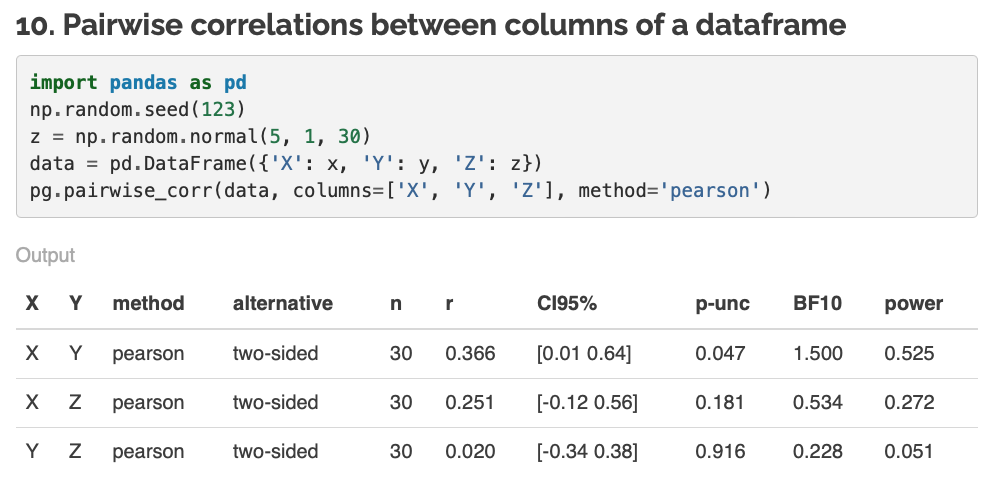


## 우리가 무엇을 쓸지
1. PARTIAL CORRELATION : 이게 VAB에서 쓰인다 (with sex and educaiton as covaraince)(웹사이트에 이론이 잘 나와있다)
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr
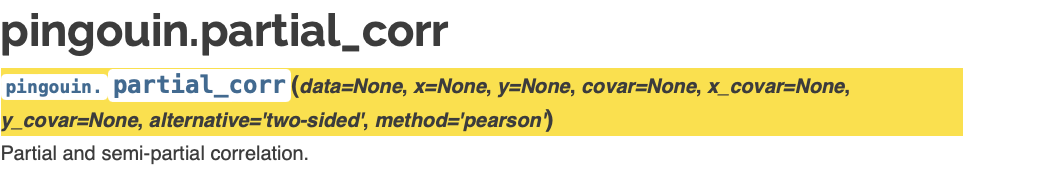

2. 1.을 matrix로 한꺼번에 하기 => use `pcorr()`쓰기 (partial correlation 만 나오고, p-value등도 안나오고 값이 robust하지 않다고 하지만, 일단 first filter역할로 한 후에, pair후보를 정하게 되면 그것에 대해서 위의 제대로된 값 구하는 것을 하자(with the p value and stuff))
https://pingouin-stats.org/generated/pingouin.pcorr.html#pingouin.pcorr
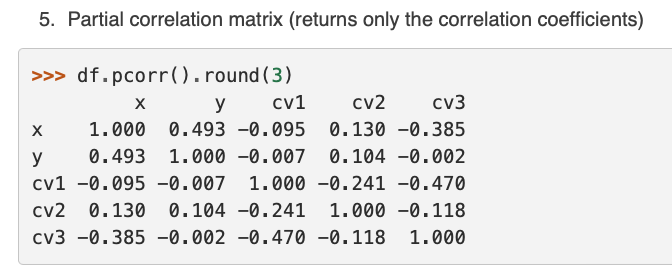

3. rcorr()도 있다는데 이거는 pcorr랑 뭐가 다른거지? 둘 중 뭐를 써야하지? (실제로 값을 구해서 비교해보기...?)
https://pingouin-stats.org/generated/pingouin.rcorr.html#pingouin.rcorr
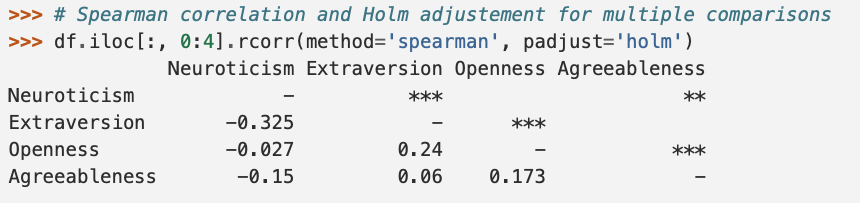


## 즉, 내가 생각하는 workflow: 
0. metadata(phenotypedata)와 BCT results dataframe을 concatenate하기
1. `pcorr()`를 써서 (BCT ersults와 phenotype 간의만(not within BCT too) 일단 변수들 간의 rough corrleation 값들을 보기
2. 그중 값이 큰 몇 pair를 정한 다음에, 그 후보 variable pair들간에 제대로된 partial correlation (with p-value and so on)을 행하기
> with education and sex as covariances
3. 그중 p-value < 0.05인 변수들에 대해서만, VAB예시에서 보듯이, `sns.regplot()`을 하기
> 4. **꼮!!!! 기존 논문들을 보고 거기서 (실제로 develop와 관련되어있따는 변수들을 찾아서) github에서 복붙하든지 해서 tool들을 더 가져와서 보기(즉, 기존 논문 driven 후보들을 두기)**

## 2. SAVING DATA 
`run_scalar_threshold.py (not exact name)으로 threshold 0.1 ~0.4, 0.01단위로 해서 slurm 돌려놓음`
=> scalar을 했는데, 가능하면 vector and 등등도 다 하기?

## 3. Pinguoin statistical analsyis

#### TODO 
> BCT result save해서, `nih_demo`가 아닌 실제 값들을 넣어서 돌리기

> linear regression (`group_reg`)도 만들기!


> 밑에서는 NIH데이터를 직접 import 했지만 (`nih_total`), 데이터를 `Data`폴더에 넣은 후, `meatadata.py`나 `load_data.py`를 수정시키기 (method로 넣기)

>> 이것 할때, NIH데이터다 불러오는 것보다, 밑에 notebook에서 했던 것처럼, loc해서 겹치는 sample 빼고 이런 것을 거치는 것을 해야함 (이것을 method의 하나로 넣든, method의 option중에 하나로 "exclude NaN and others?"여부를 정할 수 있는 optoin을 만들던지 하기)

> CBCL 등 해서 normal subjecrts extraction 코드같은 것도 만들기 (CBCL값들은 `nih_total` 변수 정의하는 곳에 있다)

> 원래있던 `load_metadata.py`도 어쩌면 밑에있는 `nih_total`에서 그냥 가져오도록 하는 것이 더 나을 수도 있따

> 2D, 3D data는 어떻게 correlation할지 생각해 봐야 할듯 (multiple column하는 그것 하기?)

### 3.1 `utils.analysis.stats`를 만들었으니, 그것을 쓰자

> **TODO (여기 코드 밑밑에 TODO1, TODO2로 시발점을 적기는 했으니, 거기서 발전시켜나가기)** 

1. ADD just regular streamline count correaltion too! (like one did by 정우쌤) 
    * 일단은 strealime flatten시켜서 1D data로만 하고, 나중에 2D data regression하는 pipeline짜면 그것으로 streamline하기
    * streamline결과 정우썜꺼랑 비교해보기 (같은 결과가 나와야 함)

2. REGULAR SUBJECT만 extract하는 것 (아마도 그 phenotype dataframe들이 output으로 주어지게 하기?)
3. 밑에 있는 것들을 modularize시키기? => 아니다 이것까지느 할필요 없을 듯 (다양한 threshold값에 대해서 loop돌리는 것도 일단은 하지말고 보류하기... 그것말고 더 중요한 것들이 많다)

<br>
    
    
    
**결과**
* bonferonni correction 안하지 않는 이상, significant한것이 없다 
    * => **age range가 적어서, age effect가 크게 보이지 않아서 그런듯??**

## new versino of the correlatoin code (doesn't work)  load_demo에서 ,married 같은 relesae 상관없이 stays-constant한느 것들은 baseline에서 가져오고, 해야할듯함... 


* also, high_educ같은거는 baseline에만 있다

문제가 있는 듯 (extract normal에서): 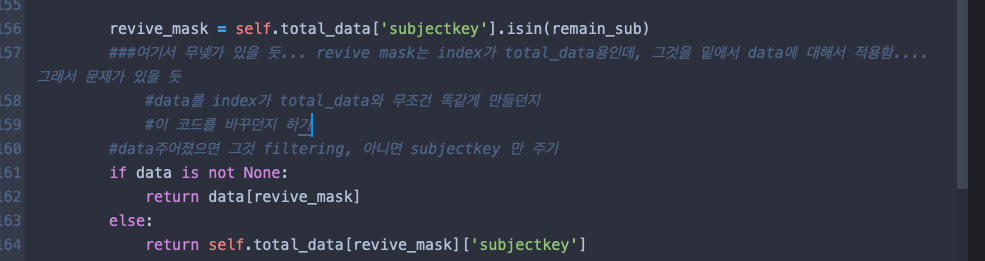

밑의 것 처럼 바꾸기 (즉 위에서 `revive_mask` 정의시 그것을 if 문에 넣어서 (return할떄) 거기서 data에 revive mask에서 만들지, total_data에서 revive mask를 만들지 결정하게 해야함!
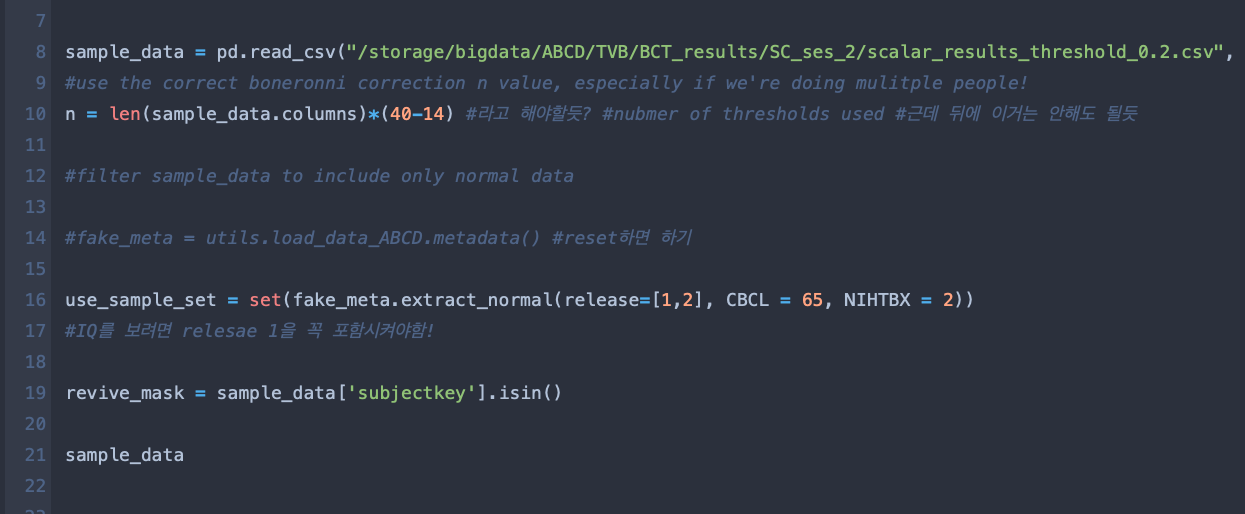

In [11]:
meta_data = utils.load_data_ABCD.metadata()

demo_data = meta_data.load_demo(release = 2)#session : baseline!

###must set index as the subject thigns, because the input data has that structure
demo_data = demo_data.set_index('subjectkey') 

/scratch/connectome/TVB/TVB_RESEARCH/utils/load_data_ABCD.py:97: UserWarning: must implmemet so that some info that don't change but is only written in baseline should be extracted too
  warnings.warn("must implmemet so that some info that don't change but is only written in baseline should be extracted too")


In [20]:
demo_data['sex']
demo_data

,eventname,sex,race_g,married,high_educ,high_educ2,income,foreign_born,religion_prefer,gay_parent,...,vol,bmi,total_ratio,history_ratio,parent_identity,demo_brthdat_v2,demo_sex_v2,gender_identity,parent_age,foreign_born_family
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARMC003PZF,1_year_follow_up_y_arm_1,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.487505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINV003RTV85,1_year_follow_up_y_arm_1,F,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.050932,21.774563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINV005V6D2C,1_year_follow_up_y_arm_1,F,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.337038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINV00BD7VDC,1_year_follow_up_y_arm_1,M,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.129021,16.439013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINV00CY2MDM,1_year_follow_up_y_arm_1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.334811,21.443903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINVZZLZCKAY,1_year_follow_up_y_arm_1,F,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.242144,25.505669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINVZZNX6W2P,1_year_follow_up_y_arm_1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.208130,17.418129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDARINVZZPKBDAC,1_year_follow_up_y_arm_1,F,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.274180,21.056255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
######changed version, debuggin needed

from utils import analysis
##scalar bct meausres보기 (for a particular threshold value)

sample_data = pd.read_csv("/storage/bigdata/ABCD/TVB/BCT_results/SC_ses_2/scalar_results_threshold_0.2.csv", index_col = 0)
#use the correct boneronni correction n value, especially if we're doing mulitple people!
n = len(sample_data.columns)*(40-14) #라고 해야할듯? #nubmer of thresholds used #근데 뒤에 이거는 안해도 될듯

###### WITH covariates into consideration
covariances = demo_data[['sex', 'bmi']] #covariances = demo_data[['sex', "high_educ"]] #즉, covariates들은 pandas dataframe형태로 넣어야함!
bct_scalar_corr_result = analysis.stat.grouped_corr(data = sample_data, y = demo_data['age'], filter_bonf = False, covar = covariances)
#third_corr_redsult = aparc_con 에 대해서 한것 여기다가 넣기 (module까지 만들 필요 없다)
print("with sex, high.educ covariates :\n", bct_scalar_corr_result)

plot.lin_reg_plot(sample_data, meta_data, x="age", y="transivity", corr_result=bct_scalar_corr_result)

#####꼭 참조하기!!!####
print("\n\n FILTER_BONF : FALSE인 경우를 본것! (p값이 모두 너무 커서)")
print("\n위에서, p 값이 거의 차이가 안나서, bonferonni correction을 안할 것을 써야만 겨우 되었다!(아니면 empty)")
print("\n\n also, ONLY LOOKED AT A PARTIULAR THRESHOLD VALUE (there's a range)")




In [24]:
covariances = demo_data[['sex', 'bmi']] 
[var for var in covariances]

['sex', 'bmi']

## Original Versino of THe correlation Code (works)

In [5]:
#### importing general packages/data that are used below###
from utils import analysis
from utils.analysis import plot
##############THESE PARTS : 다른 module의 METHOD로 넣어야 함############
"""
이 단계에서, extractino code를 load_data.py에 만들기 ???
=> 다른 사람들이 쓸 수 도 있으니, 잘 쓰기!
"""



#loading NIH data (has metadata + NIH toolbox results + other)
nih_total = pd.read_csv('/storage/bigdata/ABCD/TVB/demo.nih.cbcl.els.11875.csv', index_col=0) 

#extracting some data from nih_total
nih_only = nih_total.loc[:, :'nihtbx_picvocab_uncorrected'].dropna()
meta_data = nih_total.iloc[:, -11:].dropna() #이거는 나중에 `load_metadata`인가 그 모듈을 가져오기
#print(meta_data.columns,'\n', nih_total.columns)
####################################################################

In [15]:
sample_data.index

Index(['NDARINV0X4A2LKW', 'NDARINVRERRA7FD', 'NDARINV43M1L7PL',
       'NDARINV6WH2N8P4', 'NDARINVFKFN7X0T', 'NDARINVYJETWGU1',
       'NDARINVNUNMDE7M', 'NDARINVPUEXNZJU', 'NDARINVCYA7HWRK',
       'NDARINVPXYXMXTH',
       ...
       'NDARINV9WJ1WBFC', 'NDARINV28X6J47M', 'NDARINV36K7YFLB',
       'NDARINVEPFAURHA', 'NDARINVEPENTXVB', 'NDARINVAX8FD7BZ',
       'NDARINVRLL3TP2P', 'NDARINVCVAAN2Y5', 'NDARINV5U8RGRGL',
       'NDARINV95TJXP19'],
      dtype='object', length=8238)

/scratch/connectome/TVB/TVB_RESEARCH/utils/load_data_ABCD.py:126: UserWarning: will do only based on CBCL and NIH toolboxes.. also, NIH toolbox only has release 1 and 3
  warnings.warn("will do only based on CBCL and NIH toolboxes.. also, NIH toolbox only has release 1 and 3")


with female, high.educ covariates :
                                   n         r           CI95%     p-val
local_efficiency               5616 -0.034605  [-0.06, -0.01]  0.009512
global_efficiency              5616 -0.034605  [-0.06, -0.01]  0.009512
transivity                     5616 -0.034272  [-0.06, -0.01]  0.010227
pos_strength_sum               5616 -0.027425   [-0.05, -0.0]  0.039896
max_modularity_mertric_gam1    5616 -0.007738   [-0.03, 0.02]  0.562122
max_modularity_mertric_gam0_1  5616  0.005901   [-0.02, 0.03]  0.658431
assortativity                  5616  0.014775   [-0.01, 0.04]  0.268363
graph_radius                   5616  0.022301    [-0.0, 0.05]  0.094764
max_modularity_mertric_gam10   5616  0.024894    [-0.0, 0.05]  0.062167
graph_diameter                 5616  0.027360     [0.0, 0.05]  0.040376
char_path_len                  5616  0.032229    [0.01, 0.06]  0.015741


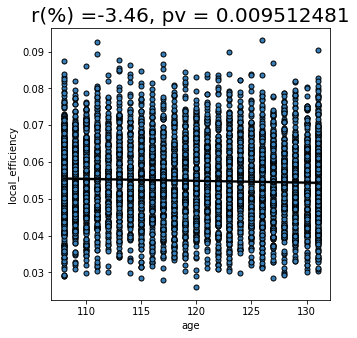



 FILTER_BONF : FALSE인 경우를 본것! (p값이 모두 너무 커서)

위에서, p 값이 거의 차이가 안나서, bonferonni correction을 안할 것을 써야만 겨우 되었다!(아니면 empty)


 also, ONLY LOOKED AT A PARTIULAR THRESHOLD VALUE (there's a range)


In [20]:
######original version!!!

##scalar bct meausres보기 (for a particular threshold value)




sample_data = pd.read_csv("/storage/bigdata/ABCD/TVB/BCT_results/SC_ses_2/scalar_results_threshold_0.2.csv", index_col = 0)
#use the correct boneronni correction n value, especially if we're doing mulitple people!
n = len(sample_data.columns)*(40-14) #라고 해야할듯? #nubmer of thresholds used #근데 뒤에 이거는 안해도 될듯

#filter sample_data to include only normal data

#fake_meta = utils.load_data_ABCD.metadata() #reset하면 하기

use_sample_set = set(fake_meta.extract_normal(release=[1,2], CBCL = 65, NIHTBX = 2)) 
#IQ를 보려면 relesae 1을 꼭 포함시켜야함!

revive_mask = sample_data.index.isin(use_sample_set)

sample_data = sample_data[revive_mask]


###### WITH covariates into consideration
covariances = meta_data[['female', "high.educ"]] #즉, covariates들은 pandas dataframe형태로 넣어야함!
bct_scalar_corr_result = analysis.stat.grouped_corr(data = sample_data, y = meta_data['age'], filter_bonf = False, covar = covariances)
#third_corr_redsult = aparc_con 에 대해서 한것 여기다가 넣기 (module까지 만들 필요 없다)
print("with female, high.educ covariates :\n", bct_scalar_corr_result)

plot.lin_reg_plot(sample_data, meta_data, x="age", y="local_efficiency", corr_result=bct_scalar_corr_result)

#####꼭 참조하기!!!####
print("\n\n FILTER_BONF : FALSE인 경우를 본것! (p값이 모두 너무 커서)")
print("\n위에서, p 값이 거의 차이가 안나서, bonferonni correction을 안할 것을 써야만 겨우 되었다!(아니면 empty)")
print("\n\n also, ONLY LOOKED AT A PARTIULAR THRESHOLD VALUE (there's a range)")

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/pingouin/correlation.py:830: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/pingouin/correlation.py:831: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/pingouin/correlation.py:831: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/pingouin/correlation.py:830: RuntimeWarning: divide by zero encountered in true_divide
  D = np.diag(np.sqrt(1 / Vi_diag))
/home/connectome/dyhan316/.local/lib/python3.8/site-packages/pingouin/correlation.py:831: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
/home/connectome/dyhan316/.local/li

with female, high.educ covariates :
                             n         r           CI95%         p-val
con_L-TH_L-CA_count      7943 -0.117092   [-0.14, -0.1]  1.202554e-25
con_R-PoCG_R-IN_count    7943 -0.107178  [-0.13, -0.09]  9.992553e-22
con_R-TH_R-CA_count      7943 -0.095530  [-0.12, -0.07]  1.449478e-17
con_L-SFG_L-CA_count     7943 -0.089098  [-0.11, -0.07]  1.801425e-15
con_R-CA_R-SFG_count     7943 -0.088644  [-0.11, -0.07]  2.500823e-15
...                       ...       ...             ...           ...
con_L-PaCG_L-PA_count    7943  0.085702    [0.06, 0.11]  2.010409e-14
con_L-PaCG_R-PrCG_count  7943  0.086657    [0.06, 0.11]  1.029474e-14
con_L-PTR_L-PCU_count    7943  0.088201    [0.07, 0.11]  3.436507e-15
con_R-PaCG_R-PrCG_count  7943  0.102131    [0.08, 0.12]  7.268010e-20
con_L-PA_L-HI_count      7943  0.112362    [0.09, 0.13]  9.854368e-24

[226 rows x 4 columns]


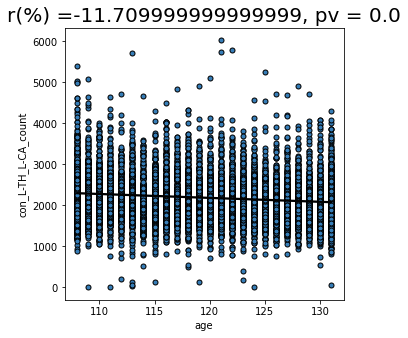

In [19]:
####CONN COUNT analysis#####

covariances = meta_data[['female', "high.educ"]] #즉, covariates들은 pandas dataframe형태로 넣어야함!

#the data that will be used
conn_count = pd.read_csv("/storage/bigdata/ABCD/TVB/con_aparc_count.csv", index_col = 0)

revive_mask = conn_count.index.isin(use_sample_set)
conn_count = conn_count[revive_mask]

#computing the grouped_corr
conn_corr_result = analysis.stat.grouped_corr(data = conn_count, y = meta_data['age'],filter_bonf=True, covar = covariances)

print("with female, high.educ covariates :\n", conn_corr_result)

#결과 plotting (one con value in particular)
plot.lin_reg_plot(conn_count, meta_data, x="age", y="con_L-TH_L-CA_count", corr_result=conn_corr_result)



In [ ]:
#위에것 matrix형태로 significace를 나타내는 것 하기
#grouped correlation에서 어떤 변화를 주기? (즉, 2D grouped correlation 가능?)

### TODO 2: 정상인만 남기기 ==> 하기!
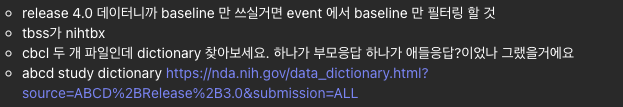
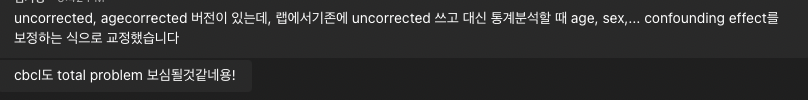

package화 해서 하기 => 다음에 ABCD 데이터셋 써야하는 사람들의 편의를 위해서

* input : anu Dataframe with index as the subject key, CBCL, IQ threshold for normal definition
* output : output of the original Dataframe, but with subjects that satisfy the above normal criteria



* 정훈쌤 release 4데이터 받음 (여기에는 cumulative 해서 모든 데이터가 다 들어있고, event name으로 알아볼 수 있다
* 그런데, 여기는 subject key를 index로 두면 안될듯 하다(same subjectkey, but different eventname인 사람들이 대다수니)
* 그리고, subjectkey가 뒤죽박죽임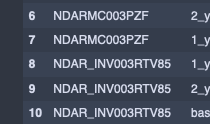
* 정훈쌤 거기서 readme인가 거기에 CSV파일 있으니, 만약 구체적으로 하고싶다면 그거 하면될듯

In [ ]:
total_data = pd.read_csv('/storage/bigdata/ABCD/TVB/ABCD_Relesae4.0_tabular_dataset.csv') #has everything

In [ ]:
total_data.head(50)

In [ ]:
nih_columns = ['nih' in columns for columns in total_data.columns]    #2~11
cbcl_columns = ['cbcl' in columns for columns in total_data.columns] #329 348

print(nih_columns.index(True))
print([i for i,val in enumerate(nih_columns) if val == True])
print([i for i,val in enumerate(cbcl_columns) if val == True])
print(len(nih_columns), len(cbcl_columns))



find_columns = ['JB' in columns for columns in total_data.columns]
print([i for i,val in enumerate(nih_columns) if val == True])

In [ ]:
#print(total_data.columns[np.arange(0,10)])
print(np.arange(329,349))
print(total_data.columns[np.arange(329,349)])
print(total_data.columns[329:349])

In [ ]:
print(total_data.columns[nih_columns])
print(total_data['nihtbx_totalcomp_uncorrected'].dropna())
#total_data.iloc[total_data['nihtbx_totalcomp_uncorrected'].dropna().index]

plt.hist(total_data['nihtbx_totalcomp_uncorrected'].dropna())
set(total_data.iloc[total_data['nihtbx_totalcomp_uncorrected'].dropna().index]['eventname']) #즉, NIH toolbox는 baseline/2year followup두개만 했다

nih_data = total_data['nihtbx_totalcomp_uncorrected'].dropna()
mu = nih_data.mean()
std = nih_data.std()
print(mu, std)
print(mu-std, mu+std)
#nih_mask = (total_data['eventname'] == "1_year_follow_up_y_arm_1") #&  (total_data['nihtbx_totalcomp_uncorrected'] )
nih_mask =  (total_data['eventname'] == "baseline_year_1_arm_1") & (abs(total_data['nihtbx_totalcomp_uncorrected']-mu) < std ) 
total_data[nih_mask][['nihtbx_totalcomp_uncorrected','eventname']][:50]

In [ ]:
total_data[['eventname','cbcl_totprob']]

a = set([2,3])
b = set([3,45])
print(a,b)
print(a & b)
c = set([3,434,45])

haha = [a,b]

c.intersection(b)

In [ ]:
##########################
####IMP IMP IMP############
##########################
cbcl_totprob = total_data['cbcl_totprob'].dropna()

#mask = (total_data['eventname']=="baseline_year_1_arm_1") & (total_data['cbcl_totprob']<25)
mask1 = (total_data['eventname']== "baseline_year_1_arm_1") & (total_data['cbcl_totprob']<25)
mask2 = (total_data['eventname']== "1_year_follow_up_y_arm_1") & (total_data['cbcl_totprob']<25)

filtered_subjects = total_data[mask2]['subjectkey']

reamin = set(filtered_subjects)

##addign the sets to update remain

#print(filtered_subjects)
revive_mask = total_data['subjectkey'].isin(reamin) #subject set에 있는 것들을 
#total_data[total_data['subjectkey'].isin(reamin)]

total_data[revive_mask] #이게 finished product


#total_data[mask][['eventname','cbcl_totprob']]
#mask2 : 51920 (1 : 52173)

## Checking if `extract_normal` method I made works (it works)

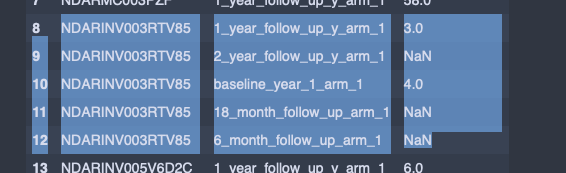
위에서처럼, 만약 relesae를 [1,2,3]으로 해두었으면, 비록 CBCL넘긴적이 없음에도, 2 year follow up 에 해당하는 CBCL값이 없기 떄문에, `extract normal`하면 죽이게 된다! (even though the subject is probably OK)

=> 즉, 이런것 어떻게 할지에 대한 discussino도 필요할듯 

In [ ]:
nih_data = total_data[total_data['eventname']=='baseline_year_1_arm_1']['nihtbx_totalcomp_uncorrected'].dropna()
mu = nih_data.mean()
std = nih_data.std()
print(mu-0.5*std, mu+0.5*std)

In [ ]:
#with the mu, std values I found, check if the two thigns (filtered data and unfiltered data) match the criteria

In [ ]:
##actually using the package I made
data = meta_data.total_data
haha =meta_data.extract_normal(data,release = [1,2], CBCL = 35, NIHTBX = 0.5)

print(len(set(haha['subjectkey'])))#명수 세기

haha[['subjectkey','eventname','cbcl_totprob','nihtbx_totalcomp_uncorrected']][:50]

In [ ]:
print("must implement the IQs too")
#35, 81 90
data[['subjectkey','eventname','cbcl_totprob','nihtbx_totalcomp_uncorrected']][:50]

In [ ]:
meta_data
a = 3

if a -1 ==2:
    print("HI")
else :
    print("HO")

In [ ]:
covariates = ['subjectkey','eventname','sex','race_g','married','high_educ','high_educ2','income','foreign_born','religion_prefer','gay_parent','gay_youth','race_ethnicity','age','family_adversity','height','weight','abcd_site','family_id','vol','bmi','total_ratio','history_ratio']
total_data[covariates][:30]

#'parent_identity','demo_brthdat_v2','demo_sex_v2','gender_identity','parent_age','foreign_born_family',

In [ ]:
new_subjectkey = total_data['subjectkey'].str.replace("_","")

new_test = total_data.copy()

new_test['subjectkey'] = new_subjectkey


new_test
#total_data[covariates].dropna()
#step 1: set id as index
#total_data.set_index('subjectkey') 

##step2 : row 2 없애기 => 해야함
#total = [data.drop(data.index[0]) for data in total]
#


##step3 : subjectkey에서 _를 없애기
#new_sub_ID = [data.index.str.replace("_","") for data in total]
#total = [data.set_index(new_sub_ID[i]) for i, data in enumerate(total)]
#
#

In [ ]:
nih_total

In [ ]:
"""
밑의 것 구현 다되면, package화시키기!
"""
"""
* input : 
    * any Dataframe ("data") with index as the subject key, 
    * CBCL, IQ threshold for normal definition
    * event (baseline(1st release), or 2nd or etc (밑에 df에 이미 나옴))
        * baseline, 1year, 2year, 3year 이 있다=> 우리는 MRI하니, 2year, 4year하면 될듯...? (or past history보기?)
* output : output of the original Dataframe, but with subjects that satisfy the above normal criteria
"""

###package inputs (self input으로 넣으면 될듯)
data = pd.read_csv('/storage/bigdata/ABCD/TVB/demo.nih.cbcl.els.11875.csv', index_col=0) 

CBCL_threshold = 65
IQ_threshold_std = 2 #within 2std만 남김
event = 1 #1 year following up, i.e. release 2의 기준으로 보기


#step0 : laoding phenotype (both cbcl and NIH, then adding them toegether as a)
cbcl_data = pd.read_csv('/scratch/connectome/TVB/TVB_RESEARCH/pheno_data/abcd_cbcls01.txt', sep='\t', index_col = 0)
NIH_toolbox_data = pd.read_csv('/scratch/connectome/TVB/TVB_RESEARCH/pheno_data/abcd_tbss01.txt', sep='\t', index_col = 0)

total = [cbcl_data, NIH_toolbox_data]
#a = pd.concat([cbcl_data, NIH_toolbox_data], join = 'inner', axis = 1)



print(" `cbcls` : 본인, `cbcl` : 부모님 ")
print("부모님 데이터는 안쓰기로 함!(at least for normal subject extraction purposes)")
print("also, add the IQ thing too")
##some editing before

#step 1: set id as index
total = [data.set_index('subjectkey') for data in total]

#step2 : row 2 없애기 => 해야함
total = [data.drop(data.index[0]) for data in total]

#step3 : subjectkey에서 _를 없애기
new_sub_ID = [data.index.str.replace("_","") for data in total]
total = [data.set_index(new_sub_ID[i]) for i, data in enumerate(total)]

#step4 : 두개 합치기 (cbcl and NIH)
"""
두개합치는것 필요할지 봐야할 듯 => 이상한 낌새가, 
하나는 갯수가 2만갠데 하나는 4만개임... event가 다른건지에 대한 조사가 필요
"""

#new_total = pd.concat([total[0],total[1], join = 'inner', axis = 1 ])






#step5 : eventname 에서, 어떠 year것을 보는지 하기! (input이 주어진다고 가정)


#print(a)
"""
cbcls and cbcl이있고 그럼.. 잘 구분하기
"""

print(total[0])
#a.drop(a.index[0])
#print(set(a['eventname']))

#a

In [ ]:
total[0]
print(total[1].columns)
print(total[0]['eventname'])

In [ ]:
print(len(total[1]['eventname']=='baseline_year_1_arm_1')) #아~ 이게 두개밖에 없구나 
print(len(total[1]['eventname']=='2_year_follow_up_y_arm_1')) #아~ 이게 두개밖에 없구나 

In [ ]:
nih_total = pd.read_csv('/storage/bigdata/ABCD/TVB/demo.nih.cbcl.els.11875.csv', index_col=0) 
#pd.read_csv("/storage/bigdata/ABCD/TVB/BCT_results/SC_ses_2/scalar_results_threshold_0.25.csv", index_col = 0)
#for loop-ize : 
    #pd.read_csv(BCT_result_save_dir+"scalar_results_threshold_{}.csv".format(threshold), index_col=0) #use 

In [ ]:
nih_total.columns

In [ ]:
plt.hist(nih_total["TotProb.CBCL.Syndrome.Scale..raw.score."])
print(np.mean(nih_total['nihtbx_totalcomp_uncorrected']),np.std(nih_total['nihtbx_totalcomp_uncorrected']))

In [ ]:
plt.hist(nih_total['nihtbx_totalcomp_uncorrected'])
print(np.mean(nih_total['nihtbx_totalcomp_uncorrected']),np.std(nih_total['nihtbx_totalcomp_uncorrected']))

In [ ]:

####load sample example####
sample_data = pd.read_csv("/storage/bigdata/ABCD/TVB/BCT_results/SC_ses_2/scalar_results_threshold_0.2.csv", index_col = 0)
corr_result = analysis.stat.grouped_corr(data = sample_data, y = meta_data['age'])
print("no covariates, just correlation :\n",corr_result)



######### no covariat,s just correlation
corr_result = analysis.stat.grouped_corr(data = nih_only, y = meta_data['age'])
print("no covariates, just correlation :\n",corr_result)

###### WITH covariates into consideration
covariances = meta_data[['female', "high.educ"]] #즉, covariates들은 pandas dataframe형태로 넣어야함!
second_corr_result = analysis.stat.grouped_corr(data = nih_only, y = meta_data['age'], covar = covariances)
print("\n\n with covariates :\n", second_corr_result)

#


## 밑 : just for checking (TRASH)

In [ ]:
##참고로, dataframe은 ==None이런거 안되어서, https://stackoverflow.com/questions/39337115/testing-if-a-pandas-dataframe-exists 
#위의 방식대로 해야함
print(meta_data == None)
print(meta_data is None) #이런식으로 해야함!

In [ ]:
#### for first checking stuff

import pingouin as pg
corr_result = pd.DataFrame()
y = meta_data['age']
covariances = meta_data[['married', "female"]]
merged_data = pd.concat([nih_only, y, covariances], join='inner', axis = 1)

for measure in nih_only.columns:
    a = pg.partial_corr(data =  merged_data, x = measure, y = y.name, covar = [i for i in covariances.columns])#covar = 'married')
    print(a)
    print(measure)

In [ ]:
p_corr = pingouin.pcorr(total_scalar_results)

p_corr.values[[np.arange(p_corr.shape[0])]*2] = 0 #change diagonal to zero

#(p_corr>0.8).index.tolist()
p_corr>0.8 
np.where(np.abs(p_corr)>0.8) #finds the coordinates of the things 

In [ ]:
p_corr>0.8
#p_corr

In [ ]:
pg             = pingouin.partial_corr(data=total_scalar_results.iloc[:,:2], x='transivity', y='local_efficiency')#, covar=['sex','edu'])
r_corr_sex     = pg["r"][0]
p_corr_sex     = pg["p-val"][0]


f,ax = plt.subplots(figsize=(5,5))
palette  = sns.color_palette("Set2", 12)

sns.regplot(x="transivity", y="local_efficiency", data=total_scalar_results.iloc[:,:2],scatter_kws={"s": 300,"edgecolor":'k','alpha':1},line_kws={"color":'k'},color=palette[10])
ax.set_title(f'r(%) ={r_corr_sex.round(4)*100}, pv = {p_corr_sex.round(9)}',fontsize=20);
# ax.set_title(r'$\rho(\%) =-45.3$, $p \leq 0.001$',fontsize=font_size);

In [ ]:
print(total_scalar_results.iloc[:,:3].head())



In [ ]:
sns.pairplot(total_scalar_results, corner = True) 

In [ ]:
total_scalar_results

In [ ]:
help(bct.charpath)

In [ ]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)
import pandas as pd
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')
print(x.shape, y.shape, z.shape)

### also becareful of p-hack!

## LOOK AT (참조)

http://localhost:11111/notebooks/TVB/TVB_showcase/virtual_aging_showcase/virtual_ageing/notebooks/1_BNM_for_resting_state.ipynb
and http://localhost:11111/notebooks/TVB/REAL_RESEARCH/Brain_Connectivity/Stella_code_BCT.ipynb
and http://localhost:11111/notebooks/TVB/virtual_aging_brain/notebooks/01_vab_github_sc_investigation.ipynb (intra-SC masking and so on이 여기다가 구현되어있다)


* http://localhost:11111/tree/TVB/virtual_aging_brain/src : data.py, analysis.py등등에서 FCD이미 구현한 것들도 많다


# TODO
0. 논문읽고, 어떤 metric이 쓰였는지, 그리고 그런 논문들의 github을 가져와서든지 해서 우리만의 toolbox를 만들기
1. SINCE ABCD HAS TOO FMRI SESSIONS, BOTH MUST BE DONE!
2. ALSO, FMRI REGISTRATION ERROR해결해야함 (deskian atlas 쓸꺼면)
3. **cognitive scores** 추가하기 (지금은 morsex이런 것들 밖에 없는데 나중에 할꺼면 다 추가할 것 => 따라서, 모든 data가 필요하다!(cognitive data)
    * 이렇게 하기 위해서는 cognitive data가 있는 것을 따로 만들어야 한다
    * 근데, 이것을 metadata csv file을 바꿈으로서 만들기 보다는, 따로 "cognitive scores"라는 csv파일을 만들어서 거기다가 하자 (이렇게 나누는게 나중에 다루기 편할 듯)
    * 즉, 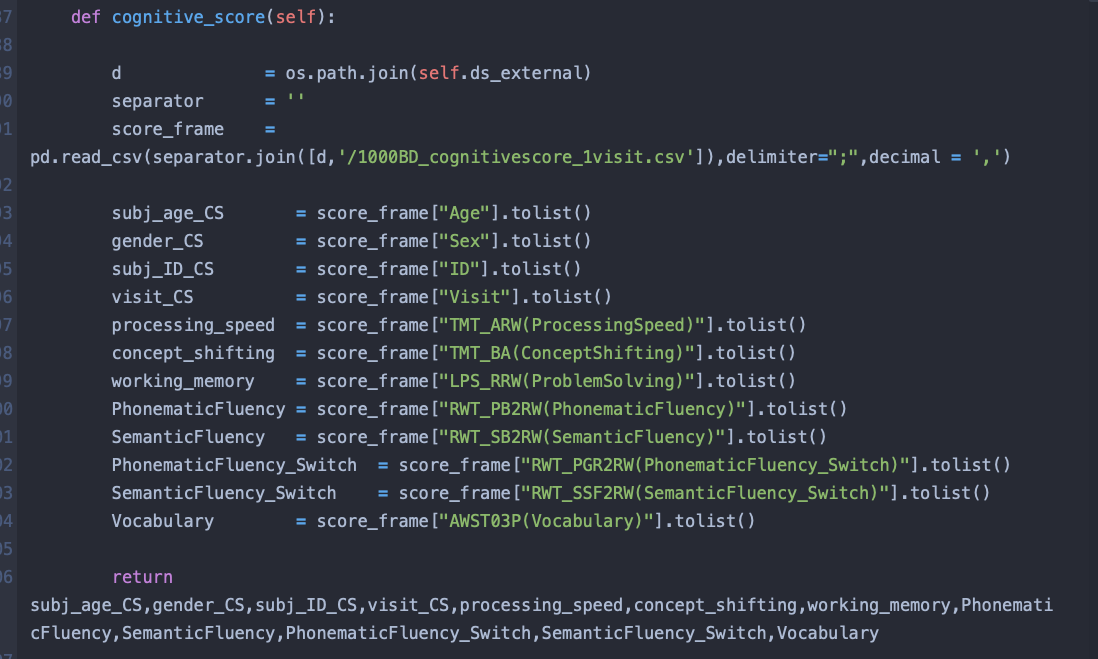 이 이미지 처럼, `pd.read_csv(separator.join([d,'/1000BD_cognitivescore_1visit.csv']),delimiter=";",decimal = ',')` 이런 `1000BD_cognitivescore_1visit.csv`를 따로 만들어서 거기서 쓰자 
> **<mark>(기존의 metadata csv를 더 길게 만들지 말고) 새로운 cogntiive score csv 만들기!</mark>**

* other todos : 이름을 바꾸기 (HBP, 100N4등등으로 썼는데, 사실은 desikan killiany고 ABCD 이고 그럼 (솔직히 function에는 큰 지장 없음)

## other todos (lower priority, but still has to be done)
1. parallel computing하는 것 implement하기 (using Unicore or sth)
2. rfmri session 2개 모두 하기 
    * 나중에 FCD할때 두개의 FCD를 평균내야함 (use more data)

## other things to note (warnings)

1. FC 폴더에 있는 두개는 사실 같은 거다 (원래는 atlas가 달라야 하는가 그런걸로 기억하는데 그렇지 않음)
    * 즉 밑의 사진에서, FC폴더밑에 있는 두 txt가 사실은 동일한 것! (아마도 내가 뭔지 몰라서 똑같게 했는 듯) 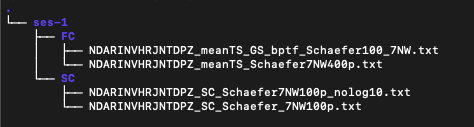
    * 알고보니, 위의 폴더가 FC 가 아닌 BOLD가 되어야하네..?  (일단은 무시)

밑 : 실패한 multiprocessing thing(무시해도 될듯해서 밑으로 뺌))

```

import time
from tqdm import tqdm
from multiprocessing.pool import ThreadPool as Pool
import multiprocessing
from itertools import repeat
start = time.time()
warnings.filterwarnings('once') #여기서는 한번만 나오게 하기 (여러번 돌아가면서 계속 뜨는 것은 싫다)

###how much to keep
sample_size = 16#8238 if you wanna run all
threshold = 0.3

##initialization of things used to save the thing
sample_sub = dataset.load_sc(subjects[0])
data, names = utils.conn_measures.compute_bct_UW(sample_sub).scalar_properties()
num_sub = len(subjects) #8238
num_measures = len(names)
scalar_bct_results = np.zeros((min(num_sub,sample_size),num_measures))

    
def compute_scalar(sub, threshold):
    sub_sc = dataset.load_sc(sub)
    data, names = utils.conn_measures.compute_bct_UW(sub_sc, threshold=threshold ).scalar_properties()
    return data, names

###SC + SCALAR (vector, matrix는 할지말지, 그리고 한다면 언제할지는 모르겠다)
warnings.filterwarnings("ignore")
#for i,sub in enumerate(tqdm(subjects[:sample_size])):

if __name__ == "__main__":
    p = Pool(1)
    results = p.starmap(compute_scalar, zip(subjects[:sample_size], repeat(threshold)))
    p.close()
    p.join()
    # DO FC TOO

#total_scalar_results = pd.DataFrame(scalar_bct_results, index = subjects[:sample_size], columns = names)
end = time.time()
print(results)
print(end-start) 

```

밑 : also another attempt at learning multiprocessing python (didn't work haha)
```
#29초 8개 8 threads
#134초  16개 16 threads
#13       8개 2 threads
#8.3초       8개 1threads
#28초 8개 4 thrads
a = zip(subjects[:sample_size], repeat(threshold))
[print(i) for i in a]
c = [i for i in a]
print("==")
#compute_scalar(('NDARINV0X4A2LKW', 0.3))

from multiprocessing import Pool
import multiprocessing as mp
import time
import os

def mul(x,y):
    c_proc = mp.current_process()
    print("Running on Process",c_proc.name,"PID",c_proc.pid)
    time.sleep(1)
    print("Ended",x,"*",y,"Process",c_proc.name)
    return x*y
        

if __name__ == '__main__':
    p = Pool(5)
    start = time.time()
    
    ret = p.starmap(mul,[[1,2],[2,3],[3,4],[4,5],[5,6]])
    print(ret)

    delta_t = time.time() - start
    print("Time :",delta_t)
    
    p.close()
    p.join()


```

In [ ]:
##proof both FC data are the same

used_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_GS_bptf_Schaefer100_7NW.txt")
unused_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_Schaefer7NW400p.txt")

print(np.all(used_data == unused_data))